In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton, bisect

# Actividad 04: Raices y ecuaciones de una variable

---
### Profesor: Juan Marcos Marín Ramírez
#### Métodos Computacionales 2025-1
---

# 1

El método de **Regula Falsi** es una modificación al método de Bisección. Con base en los siguientes pasos, escriba una función que calcule la raiz de una función. Pruebe con $x^2 - 4 = 0$, y examine la convergencia en función de la tolerancia.


### Pasos

1. **Inicialización**:
   - Se parte de un intervalo $[a, b]$ donde $f(a)$ y $f(b)$ tienen signos opuestos.
   - Esto garantiza que hay al menos una raíz en el intervalo (por el teorema del valor intermedio).

2. **Cálculo del punto de intersección**:
   - En lugar de tomar el punto medio como en la bisección, se calcula un punto c usando la siguiente fórmula:
     
     $$c = \frac{a \cdot f(b) - b \cdot f(a)}{f(b) - f(a)}$$

   - Esta fórmula representa la intersección de la línea que conecta los puntos $(a, f(a))$ y $(b, f(b))$ con el eje $x$.

3. **Evaluación y actualización del intervalo**:
   - Se evalúa $f(c)$.
   - Si $f(c) = 0$ (o es menor que una tolerancia establecida), $c$ es la raíz buscada.
   - Si $f(c)$ tiene el mismo signo que $f(a)$, se actualiza $a = c$.
   - Si $f(c)$ tiene el mismo signo que $f(b)$, se actualiza $b = c$.

4. **Iteración**:
   - Se repiten los pasos 2 y 3 hasta que se cumpla un criterio de parada (por ejemplo, $|f(c)| < tolerancia$ o se alcance un número máximo de iteraciones).

In [ ]:
def Regula_Falsi(f, a, b, tol=1e-6, max_iter=100):
  c_anterior = []
  if f(a) * f(b) >= 0:
   raise ValueError('El intervalo no es válido f(a) * f(b) <= 0 ')
  else:
    for i in range(max_iter):
        c = (a * f(b) - b * f(a)) / (f(b) - f(a))
        c_anterior.append(c)
        if abs(f(c)) < tol:
            return c, c_anterior, i + 1

        elif f(c) * f(a) > 0:
            a = c
        else:
            b = c
    raise RuntimeError(f'No se encontró la raíz después de {max_iter} iteraciones')

In [ ]:
f = lambda x: (x**2) - 4
raiz, v, i = Regula_Falsi(f, 0, 3, tol = 1e-15)
print(f' La raiz es {raiz}')
print(f' El número de iteraciones es {i}')

 La raiz es 2.0
 El número de iteraciones es 24


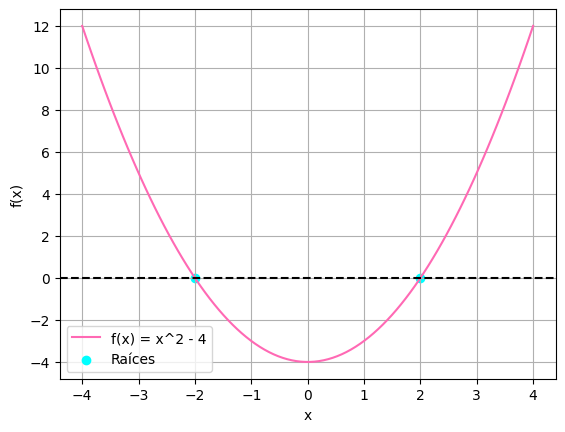

In [ ]:
#Gráficamos
x = np.linspace(-4, 4, 100)
plt.plot(x, f(x), label = 'f(x) = x^2 - 4', color = 'hotpink')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.axhline(0, color = 'black', linestyle='--')
plt.scatter([-2, 2], [0, 0], color='cyan', label='Raíces', marker='o')
plt.legend()
plt.grid()
plt.show()

# 2

Una carga total $Q$ se distribuye uniformemente alrededor de un conductor en forma de anillo de radio $a$. Una carga $q$ se encuentra a una distancia $x$ horizontalmente a través del centro del anillo. La fuerza ejercida sobre la carga por el anillo está dada por:

$$F = \frac{1}{4\piϵ_0}\frac{qQx}{(x^2+a^2)^{3/2}}$$

con $q$ y $Q$ de $2\times 10^{-5}$C.

  * Escriba una función donde ingresen los valores de $a$ y $x$ para hallar la fuerza.
  * Haga un gráfico de $F(x)$ para un anillo de radio $a= 0.85$m para $0.1\leq x\leq 2.0$m
  * Usando el método de Newton-Raphson y otro diferente, para encontrar el valor de $x$ en el cual la fuerza será equivalente a 1.25 N.
  * Encuentre qué sucede si disminuimos el radio con respecto a la fuerza que experimentará la carga $q$.

In [ ]:
#Definimos la función para hallar la fuerza

def fuerza_electrica(a, x):
  q = 2*10**-5
  Q = 2*10**-5
  epsilon0 = 8.85e-12
  return ((1)/(4*np.pi*epsilon0))*((q*Q*x)/((x**2+a**2)**(3/2)))
fuerza_electrica(0.85,1)

1.5909920544142

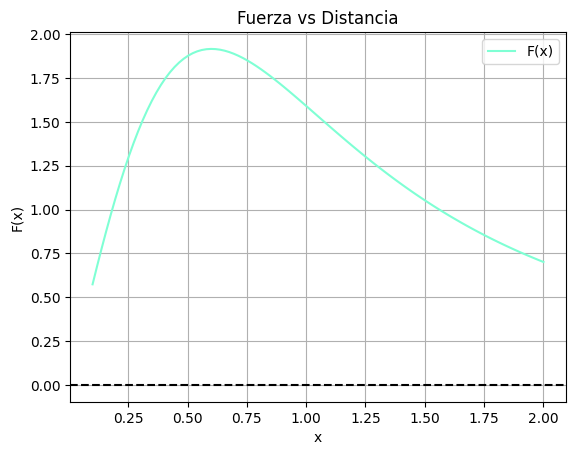

In [ ]:
#Graficamos la función para a=0.85 m y 0.1≤x≤2.0
x1 = np.linspace(0.1, 2.0, 100)

plt.plot(x1, fuerza_electrica(0.85, x1), label = 'F(x)', color = 'aquamarine')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.axhline(0, color = 'black', linestyle='--')
plt.title('Fuerza vs Distancia')
plt.legend()
plt.grid()
plt.show()

In [ ]:
#Usando el método de Newton-Raphson y Biseccion, encontramos el valor de  x  en el cual la fuerza será equivalente a 1.25 N
#Definimos una función tal que f(x) = fuerza_electrica - 1.25
a = 0.85
def f2(x):
    return fuerza_electrica(a, x) - 1.25

x_newton = newton(f2, x0=1.0)

# Bisección
x_bisect = bisect(f2, 0.3, 1.5)

print(f'Newton-Raphson: x = {x_newton:.4f} m')
print(f'Bisección: x = {x_bisect:.4f} m')

Newton-Raphson: x = 1.2979 m
Bisección: x = 1.2979 m


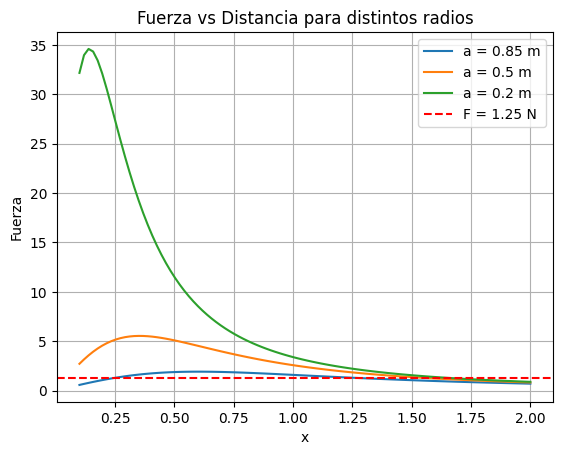

In [ ]:
x_vals = np.linspace(0.1, 2.0, 100)

plt.figure()
for radio in [0.85, 0.5, 0.2]:
    F_vals = fuerza_electrica(radio, x_vals)
    plt.plot(x_vals, F_vals, label=f'a = {radio} m')

plt.axhline(1.25, color='red', linestyle='--', label='F = 1.25 N')
plt.xlabel('x')
plt.ylabel('Fuerza')
plt.title('Fuerza vs Distancia para distintos radios')
plt.legend()
plt.grid()
plt.show()
#A menor radio, la fuerza máxima ocurre más cerca del centro y tiene diferente intensidad.

# 3

La velocidad ascendente $v$ de un cohete se puede calcular mediante
$$v = u\ln \frac{m_0}{m_0 - qt} - gt$$

donde $u$ es la velocidad a la que se expulsa el combustible, $m_0$ la masa inicial del cohete en $t = 0$, $q$ la razón de consumo del combustible y $g = 9.81$ m/s$^2$.

* Escriba una función para $v$ con las variables asociadas.
* Sea $m_0 = 1.6\times 10^5$ kg, $u = 1800$ m/s y $q = 2600$ kg/s realice un grafico de $v(t)$ para $0\leq t\leq 100$ s.
* Encuentre el valor de tiempo para el cual $v = 750$ m/s usando el método de Newton-Raphson, Bisección y el de Regula-Falsi
* Varie los valores de $u$ (utilice por lo menos 20) y encuentre los tiempos para los cuales el cohete alcanzará la velocidad de 750 m/s. Qué conclusiones puede sacar?



<ipython-input-49-d44dd477e454>:7: RuntimeWarning: invalid value encountered in log
  return (u* np.log(m0 / (m0-q*t)))-(g*t)


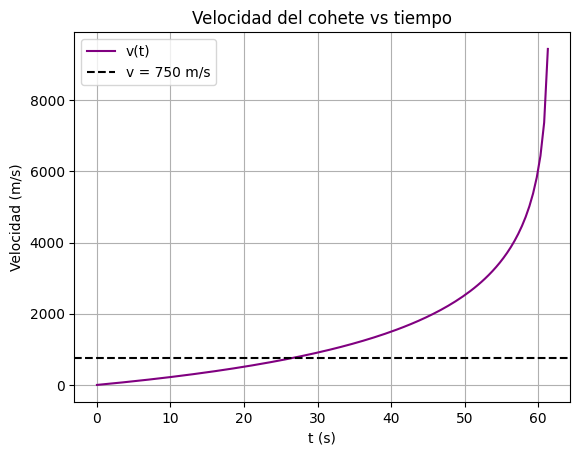

In [ ]:
m0 = 1.6e5
u = 1800
q = 2600
g = 9.81

def v(t):
    return (u* np.log(m0 / (m0-q*t)))-(g*t)

#Graficamos v(t)  para 0≤t≤100 s
t_vals = np.linspace(0, 100, 200)
v_vals = v(t_vals)

plt.plot(t_vals, v_vals, label='v(t)', color='purple')
plt.axhline(750, color='black', linestyle='--', label='v = 750 m/s')
plt.xlabel('t (s)')
plt.ylabel('Velocidad (m/s)')
plt.title('Velocidad del cohete vs tiempo')
plt.legend()
plt.grid()
plt.show()

In [ ]:
#Definimos f(t) = v(t) - 750 = 0
def f(t):
    return v(t) - 750

t_newton = newton(f, x0=10)
t_bisect = bisect(f, 5, 30)
t_regula,_,_ = Regula_Falsi(f, 5, 30)
print(f"Newton-Raphson: t ≈ {t_newton:.2f} s")
print(f"Bisección: t ≈ {t_bisect:.2f} s")
print(f"Regula-Falsi: t ≈ {t_regula:.2f} s")

Newton-Raphson: t ≈ 26.41 s
Bisección: t ≈ 26.41 s
Regula-Falsi: t ≈ 26.41 s


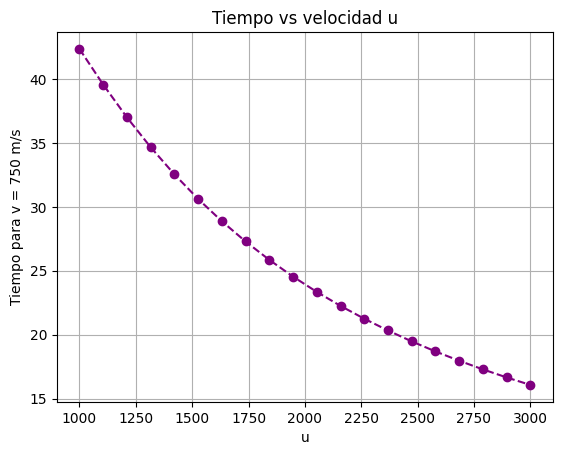

In [ ]:
#Variamos los valores de u y encontramos los valores para los cuales el cohete va a alcanzar 750m/s
u_vals = np.linspace(1000, 3000, 20)  # 20 valores de u
t_vals_u = []

for u_ in u_vals:
    def v_(t):  # redefine la función con nuevo u
        return (u_ * np.log(m0 / (m0 - q * t))) - (g * t)
    def f_(t):
        return v_(t) - 750
    try:
        t_sol,_,_ = Regula_Falsi(f_, 1, 50)
        t_vals_u.append(t_sol)
    except ValueError:
        t_vals_u.append(np.nan)  # si no hay solución

plt.plot(u_vals, t_vals_u, marker='o', color='purple', ls='--')
plt.xlabel('u')
plt.ylabel('Tiempo para v = 750 m/s')
plt.title('Tiempo vs velocidad u')
plt.grid()
plt.show()
#Cuando u aumenta, el tiempo para llegar a 750 m/s disminuye, o sea que, una mayor u
#implica una aceleración más rápida del cohete.